# Web and Social Meadia Analytics and Visualisation

## API Credentials

In [1]:
import json
credentials={}
credentials['CONSUMER_KEY'] = '93eZLqS4H2iip0SkJblOMelho'
credentials['CONSUMER_SECRET'] = 'B3bYuH0yZpJzChEDybsKvzj7NGsdUkZxrwfXehr6YYlSq6iW03'
credentials['ACCESS_TOKEN'] = '4660926379-YSULFyAxefB6qEabeL3mZ62WHfBtbUTnQ51AzI5'
credentials['ACCESS_SECRET'] = 'MBmFfGZtUZMEoSN9Eux1ZKT0ZbKldqZ93xpCnl3W0T8NG'
with open("twitter_credentials.json", "w") as file: 
  json.dump (credentials, file)

## Installing Twython Python Wrapper

In [2]:
pip install twython

  Using cached twython-3.9.1-py3-none-any.whl (33 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install jsons

  Using cached jsons-1.6.3-py3-none-any.whl (60 kB)
  Using cached typish-1.9.3-py3-none-any.whl (45 kB)



In [4]:
pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


## Importing Dependencies


In [5]:
import pandas as pd
from textblob import TextBlob
import json
import time

In [6]:
from twython import Twython
python_tweets =Twython('93eZLqS4H2iip0SkJblOMelho','B3bYuH0yZpJzChEDybsKvzj7NGsdUkZxrwfXehr6YYlSq6iW03')

In [8]:
id = 23424848
nig= Twython.get_place_trends(python_tweets, id=id)

In [9]:
dict_={'name':[], 'tweet_volume':[]}
import pandas as pd
import matplotlib as plt

for status in nig[0]['trends']:
    dict_['name'].append(status['name'])
    dict_['tweet_volume'].append(status['tweet_volume'])
  
dictt_={'name':[], 'woeid':[]}    
for status in nig[0]['locations']:
    dictt_['name'].append(status['name'])
    dictt_['woeid'].append(status['woeid'])
table1 = pd.DataFrame(dictt_)
table1.sort_values(by='woeid', inplace=True, ascending=False)
table1.head()

,name,woeid
0,India,23424848


{'statuses': [{'created_at': 'Mon May 09 05:43:02 +0000 2022', 'id': 1523539017437880321, 'id_str': '1523539017437880321', 'text': 'THAT TURN!\n\nKids following this IPL must be finding Livingstone bowling leg-spin to right handers and off-spin to l… https://t.co/oMXNkxhq9T', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/oMXNkxhq9T', 'expanded_url': 'https://twitter.com/i/web/status/1523539017437880321', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1076776250956566530, 'id_str': '1076776250956566530', 'name': 'TheRandomCricketPhotosGuy', 'screen_name': 'RandomCricketP1'

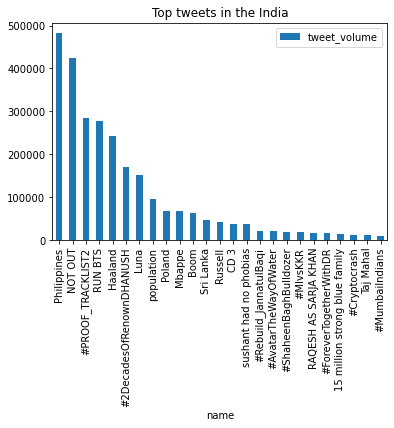

In [10]:
table = pd.DataFrame(dict_)
table.sort_values(by='tweet_volume', inplace=True, ascending=False)

table2 = table[table["tweet_volume"]>0]#filter to remove all NAN

table2.head(5)

table2.to_csv(r'IPL.csv', index = False)

table2.plot.bar(x="name", y="tweet_volume", rot=90, title="Top tweets in the India")
    
#creating our query to extract tweets
query={'q': 'IPL',
       'result_type': 'popular',
       'count': 100,
       'lang': 'en',
       'woeid': id
       }
sample_return = python_tweets.search(**query)
print(sample_return)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import seaborn as sns

#creating a dictionary to put the desired fields_Favorite count in the dataset
dict_={'user': [], 'date':[], 'text': [], 'favorite_count': [],'place': [],'source': [],'created_at':[],'verified':[],'followers_count':[]}

    
for status in sample_return['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])
    dict_['place'].append(status['place'])
    dict_['source'].append(status['source'])
    dict_['created_at'].append(status['created_at'])
    dict_['verified'].append(status['user']['verified'])
    dict_['followers_count'].append(status['user']['followers_count'])
    
#structure data in a pandas Dataframe for easier manipulation and visualisation
df = pd.DataFrame(dict_)

In [12]:
df.head()

,user,date,text,favorite_count,place,source,created_at,verified,followers_count
0,RandomCricketP1,Mon May 09 05:43:02 +0000 2022,THAT TURN!\n\nKids following this IPL must be ...,10282,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Mon May 09 05:43:02 +0000 2022,True,27229
1,CSKFansOfficial,Sun May 08 16:07:17 +0000 2022,Describe @msdhoni innings using emojis only. \...,4651,None,"<a href=""http://twitter.com/download/android"" ...",Sun May 08 16:07:17 +0000 2022,True,300337
2,MohammadKaif,Sun May 08 09:55:17 +0000 2022,What do great players do when out of India tea...,20635,None,"<a href=""http://twitter.com/download/iphone"" r...",Sun May 08 09:55:17 +0000 2022,True,1510250
3,CricCrazyJohns,Mon May 09 05:48:10 +0000 2022,Dinesh Karthik in the last 4 overs in IPL 2022...,3888,None,"<a href=""http://twitter.com/download/android"" ...",Mon May 09 05:48:10 +0000 2022,True,136465
4,CricCrazyJohns,Sun May 08 14:48:20 +0000 2022,Sample size is too less but Devon Conway has 5...,3895,None,"<a href=""http://twitter.com/download/android"" ...",Sun May 08 14:48:20 +0000 2022,True,136465


<AxesSubplot:title={'center':'Main Handles Who Tweeted India'}, xlabel='user'>

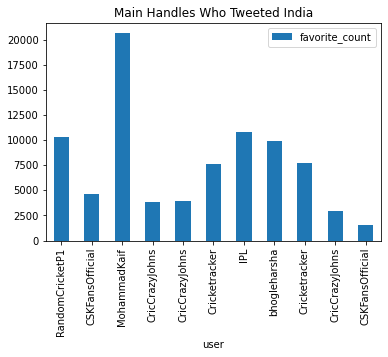

In [13]:
# Main handels who tweeted in India
df.to_csv(r'IPL.csv', index = False)
df.plot.bar(x="user", y="favorite_count", rot=90, title="Main Handles Who Tweeted India")

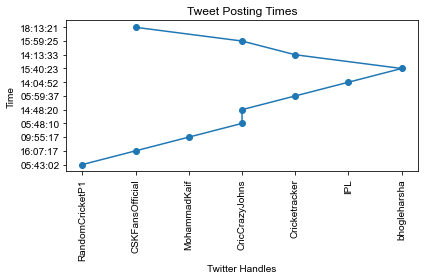

In [14]:
# To come up with the time when tweets started
mf = pd.read_csv('IPL.csv')
mf
fav_count = mf['favorite_count']
tf= df['date'].str.split(' ', expand=True)
tf
tf.rename(columns={3: 'Time'})
tf[3]

time = tf[3]
month = df['user']

plt.plot_date(month, time, linestyle='solid')
plt.xticks(rotation=90)
#pltting the time series for the time of posts
plt.style.use('seaborn')
plt.title('Tweet Posting Times')
plt.xlabel('Twitter Handles')
plt.ylabel('Time')

plt.tight_layout()

In [15]:
#Dealing with the devices used to tweet

dict_={'user': [], 'date':[], 'source': [], 'favorite_count': []}

for status in sample_return['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['source'].append(status['source'])
    dict_['favorite_count'].append(status['favorite_count'])
    
#structure data in a pandas Dataframe for easier manipulation and handling
dfn = pd.DataFrame(dict_)
dfn.sort_values(by='favorite_count', inplace=True, ascending=False)
dfn

dfnn = dfn[dfn["favorite_count"]>0]#filter to remove all NAN
dfnn.head()

,user,date,source,favorite_count
2,MohammadKaif,Sun May 08 09:55:17 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",20635
6,IPL,Sun May 08 14:04:52 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",10817
0,RandomCricketP1,Mon May 09 05:43:02 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",10282
7,bhogleharsha,Mon May 09 15:40:23 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",9961
8,Cricketracker,Sun May 08 14:13:33 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",7713


In [16]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [17]:
from bs4 import BeautifulSoup
import pycountry

data_ipl=pd.read_csv('ipl.csv', keep_default_na=False)
data_ipl['source'] = [BeautifulSoup(text).get_text() for text in data_ipl['source'] ]

data_ipl.sort_values(by='favorite_count',inplace=True,ascending=False)
data_ipl.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=True)
display(data_ipl.head(10))

,user,date,text,favorite_count,place,source,created_at,verified,followers_count
2,MohammadKaif,Sun May 08 09:55:17 +0000 2022,What do great players do when out of India tea...,20635,,Twitter for iPhone,Sun May 08 09:55:17 +0000 2022,True,1510250
6,IPL,Sun May 08 14:04:52 +0000 2022,That's that from Match 54. \n\n@RCBTweets win ...,10817,,Twitter Web App,Sun May 08 14:04:52 +0000 2022,True,7834960
0,RandomCricketP1,Mon May 09 05:43:02 +0000 2022,THAT TURN!\n\nKids following this IPL must be ...,10282,,Twitter Web App,Mon May 09 05:43:02 +0000 2022,True,27229
7,bhogleharsha,Mon May 09 15:40:23 +0000 2022,"If you haven't watched this from Bumrah today,...",9961,,Twitter for Android,Mon May 09 15:40:23 +0000 2022,True,8927521
8,Cricketracker,Sun May 08 14:13:33 +0000 2022,#RCB won only three matches in Grenn jersey so...,7713,,Twitter Web App,Sun May 08 14:13:33 +0000 2022,True,300414
5,Cricketracker,Mon May 09 05:59:37 +0000 2022,Classic MS Dhoni 🎤\n\n📸: IPL/BCCI\n\n#IPL2022 ...,7608,,Twitter Web App,Mon May 09 05:59:37 +0000 2022,True,300414
1,CSKFansOfficial,Sun May 08 16:07:17 +0000 2022,Describe @msdhoni innings using emojis only. \...,4651,,Twitter for Android,Sun May 08 16:07:17 +0000 2022,True,300337
4,CricCrazyJohns,Sun May 08 14:48:20 +0000 2022,Sample size is too less but Devon Conway has 5...,3895,,Twitter for Android,Sun May 08 14:48:20 +0000 2022,True,136465
3,CricCrazyJohns,Mon May 09 05:48:10 +0000 2022,Dinesh Karthik in the last 4 overs in IPL 2022...,3888,,Twitter for Android,Mon May 09 05:48:10 +0000 2022,True,136465
9,CricCrazyJohns,Sun May 08 15:59:25 +0000 2022,MS Dhoni in last 11 innings in IPL:\n\n18*(6)\...,2990,,Twitter for Android,Sun May 08 15:59:25 +0000 2022,True,136465


C:\Users\CB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


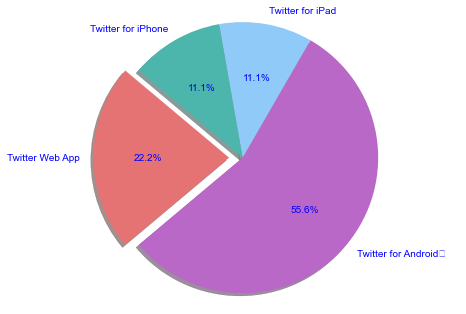

In [18]:
data_ipl.groupby(data_ipl['source'].tolist(),as_index=False).size()
# Tprint pie chart sohwing the device used to tweet in percentage

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

labels = ['Twitter Web App',
          'Twitter for Android	','Twitter for iPad','Twitter for iPhone'
          ]
sizes = [2,5,1,1]
colors = ["#e57373", "#ba68c8", "#90caf9", "#4db6ac"]
explode=(0.1,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%2.1f%%', shadow=True, startangle=140,textprops={'color':"b"})

plt.axis('equal')
plt.show()

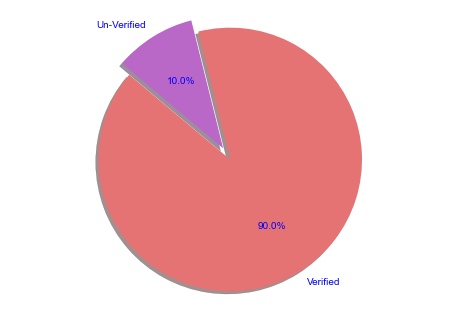

In [19]:
data_ipl.groupby(data_ipl['verified'].tolist(),as_index=False).size()
# Tprint pie chart sohwing the device used to tweet in percentage

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

labels = ['Verified','Un-Verified'
          ]
sizes = [9,1]
colors = ["#e57373", "#ba68c8",]
explode=(0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%2.1f%%', shadow=True, startangle=140,textprops={'color':"b"})

plt.axis('equal')
plt.show()

total number:  11
positive number:  5
negative number:  1
neutral number:  5


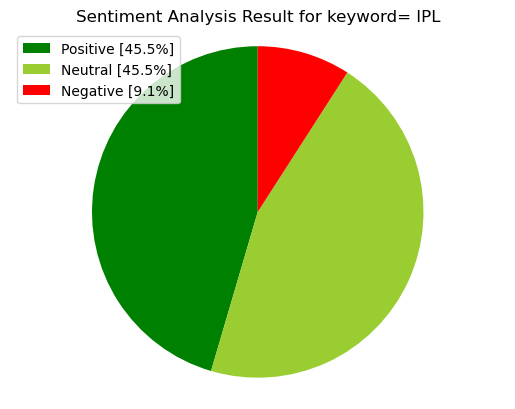

In [41]:
topic='IPL'
csv_file_name='IPL.csv'

df=pd.read_csv(csv_file_name)
df.head()
tweets=df['text'].tolist();

def percentage(part,whole):  
    return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
 
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, len(tweets))
negative = percentage(negative, len(tweets))
neutral = percentage(neutral, len(tweets))
polarity = percentage(polarity, len(tweets))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))



labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'yellowgreen','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+topic+"" )
plt.axis("equal")
plt.show()

#  Implementing LSA using Gensim

In [20]:
! pip install langdetect

## Import the required libraries and packages

In [21]:
import re
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect

In [22]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


## Import the required libraries and packages

In [23]:
#import modules
import os.path 
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt
import nltk

## Loading Data

In [24]:
def load_data(path,file_name):
    documents_list = []

    titles=[]
    
    with open( os.path.join('India.csv') ,"r") as fin:
        for line in fin.readlines ():
            text=line.strip()
            documents_list.append(text)
    print("Total Mumber of Documents:" ,len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

##  Pre-processing Data

In [25]:
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        raw = i.lower() 
        tokens = tokenizer.tokenize(raw) 
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

## Prepare the corpus by creating document-term matrix

In [26]:
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [27]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Frequency distribution

In [28]:
import pandas as pd
data=pd.read_table('IPL.csv', sep=',')

import nltk
from nltk.tokenize import word_tokenize
review = data.text.str.cat(sep=' ')

tokens = word_tokenize(review)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

185


In [29]:
frequency_dist = nltk.FreqDist(tokens)

## Split your data into train and test

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
data['text'], data['verified'], test_size=0.3, random_state=1)

## Extract features using TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(7, 95) (4, 95)


In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

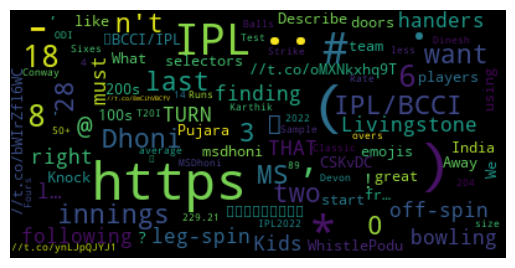

In [43]:
wordcloud = WordCloud(max_font_size=50, max_words=100,
background_color="black").generate_from_frequencies(frequency_dist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()